In [110]:
import os
import pandas as pd
import re
import datetime as dt
import numpy as np

from IPython.display import display

from sklearn.model_selection import train_test_split
import io
import requests
import warnings
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as mt
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
warnings.filterwarnings('ignore')

In [111]:
df = pd.read_csv(r'C:\Users\drsco\Documents\GitHub\QTW\qtw\case study 5\log2.csv')
df = df.round(5)
df.info()
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.00000,65532.00000,65532.00000,65532.00000,65532.00000,65532.00000,65532.00000,65532.00000,65532.00000,65532.00000,65532.00000
mean,49391.96934,10577.38581,19282.97276,2671.04993,97123.95009,22385.79691,74738.15318,102.86603,65.83358,41.39953,61.46650
std,15255.71254,18466.02704,21970.68967,9739.16228,5618438.90905,3828138.64979,2463207.71188,5133.00235,302.46176,3218.87129,2223.33227
min,0.00000,0.00000,0.00000,0.00000,60.00000,60.00000,0.00000,1.00000,0.00000,1.00000,0.00000
25%,49183.00000,80.00000,0.00000,0.00000,66.00000,66.00000,0.00000,1.00000,0.00000,1.00000,0.00000
50%,53776.50000,445.00000,8820.50000,53.00000,168.00000,90.00000,79.00000,2.00000,15.00000,1.00000,1.00000
75%,58638.00000,15000.00000,38366.25000,443.00000,752.25000,210.00000,449.00000,6.00000,30.00000,3.00000,2.00000
max,65534.00000,65535.00000,65535.00000,65535.00000,1269359015.00000,948477220.00000,320881795.00000,1036116.00000,10824.00000,747520.00000,327208.00000


In [112]:
percent_missing = df.isnull().sum() * 100 / len(df)
#Put percents into df 
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
#Sort it and show the results
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
Source Port,Source Port,0.0
Destination Port,Destination Port,0.0
NAT Source Port,NAT Source Port,0.0
NAT Destination Port,NAT Destination Port,0.0
Action,Action,0.0
Bytes,Bytes,0.0
Bytes Sent,Bytes Sent,0.0
Bytes Received,Bytes Received,0.0
Packets,Packets,0.0
Elapsed Time (sec),Elapsed Time (sec),0.0


In [113]:
df['Action'].value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

Text(0.5, 1.0, 'Value Counts for Action Taken by System')

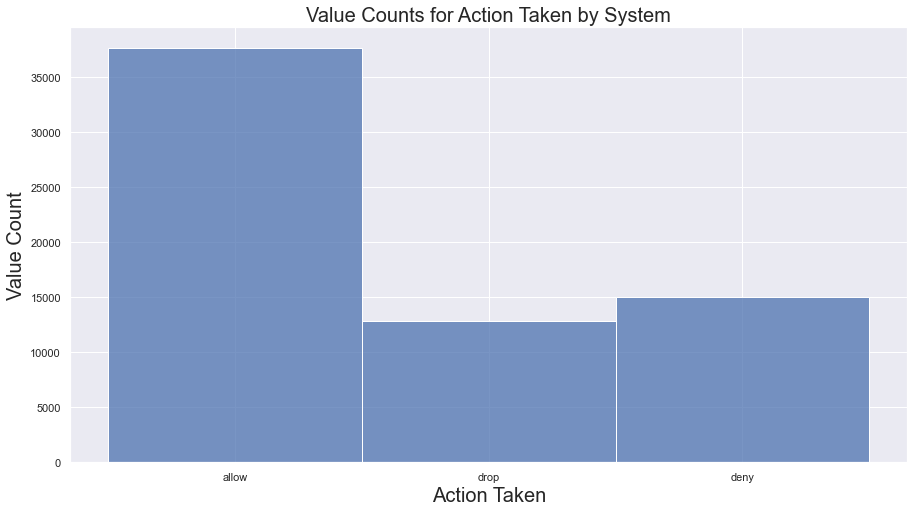

In [114]:
df.drop(df[df['Action'] == 'reset-both'].index, inplace = True)

import seaborn as sns
sns.set()
sns.set(rc = {'figure.figsize':(15,8)})
p = sns.histplot(df['Action'], kde=False)
p.set_xlabel("Action Taken", fontsize = 20)
p.set_ylabel("Value Count", fontsize = 20)
p.set_title("Value Counts for Action Taken by System", fontsize = 20)

In [115]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
dfScaled=df
dfScaled[['Source Port','Destination Port','NAT Source Port',
    'NAT Destination Port','Bytes','Bytes Sent','Bytes Received','Packets',
    'Elapsed Time (sec)','pkts_sent','pkts_received']]=mms.fit_transform(dfScaled[['Source Port',
    'Destination Port','NAT Source Port','NAT Destination Port','Bytes','Bytes Sent','Bytes Received',
    'Packets','Elapsed Time (sec)','pkts_sent','pkts_received']])
print(dfScaled)
SVMDat = dfScaled.copy()

       Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0         0.873165          0.000809         0.832944              0.000809   
1         0.858455          0.051713         0.858442              0.051713   
2         0.104999          0.767849         0.660182              0.767849   
3         0.771401          0.051713         0.771389              0.051713   
4         0.762993          0.006760         0.699596              0.006760   
...            ...               ...              ...                   ...   
65527     0.971877          0.001221         0.201984              0.001221   
65528     0.777673          0.001221         0.205768              0.001221   
65529     0.837291          0.006790         0.000000              0.000000   
65530     0.837275          0.006790         0.000000              0.000000   
65531     0.837230          0.006790         0.000000              0.000000   

      Action         Bytes    Bytes Sent  Bytes Rec

In [116]:
target_mod = {
    'allow':'allow',
    'deny':'deny',
    'drop':'deny',
    'reset-both':'deny'
}
df['Action2'] = df['Action'].map(target_mod)
del df['Action']
df['Action2'] = df['Action2'].astype('category')
df['Action2'].value_counts(normalize=False)

allow    37640
deny     27838
Name: Action2, dtype: int64

In [117]:
X = dfScaled.drop('Action2', axis=1)
y = dfScaled['Action2']

#Direct train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [118]:
from sklearn.model_selection import ShuffleSplit
cv_object = ShuffleSplit(n_splits=5,random_state=58,test_size  = 0.2)
print(cv_object)

ShuffleSplit(n_splits=5, random_state=58, test_size=0.2, train_size=None)


In [119]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
import pandas as pd
param_grid= {'kernel': ('linear', 'rbf'),
             'C': [.5, 10, 100]}
base_estimator = SVC(gamma='scale')
X, y = make_classification(n_samples=1000)
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=2, min_resources=20).fit(X_train,y_train)
sh.best_estimator_
model = sh.best_estimator_

In [120]:
from sklearn.metrics import accuracy_score
svm = model.predict(X_test)
accuracy_score(svm, y_test)

0.9935858277336591

In [121]:
print(sh.best_estimator_)

SVC(C=100)
